<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/3551-3600.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [55]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

RDKit ERROR: [13:11:44] non-ring atom 1 marked aromatic


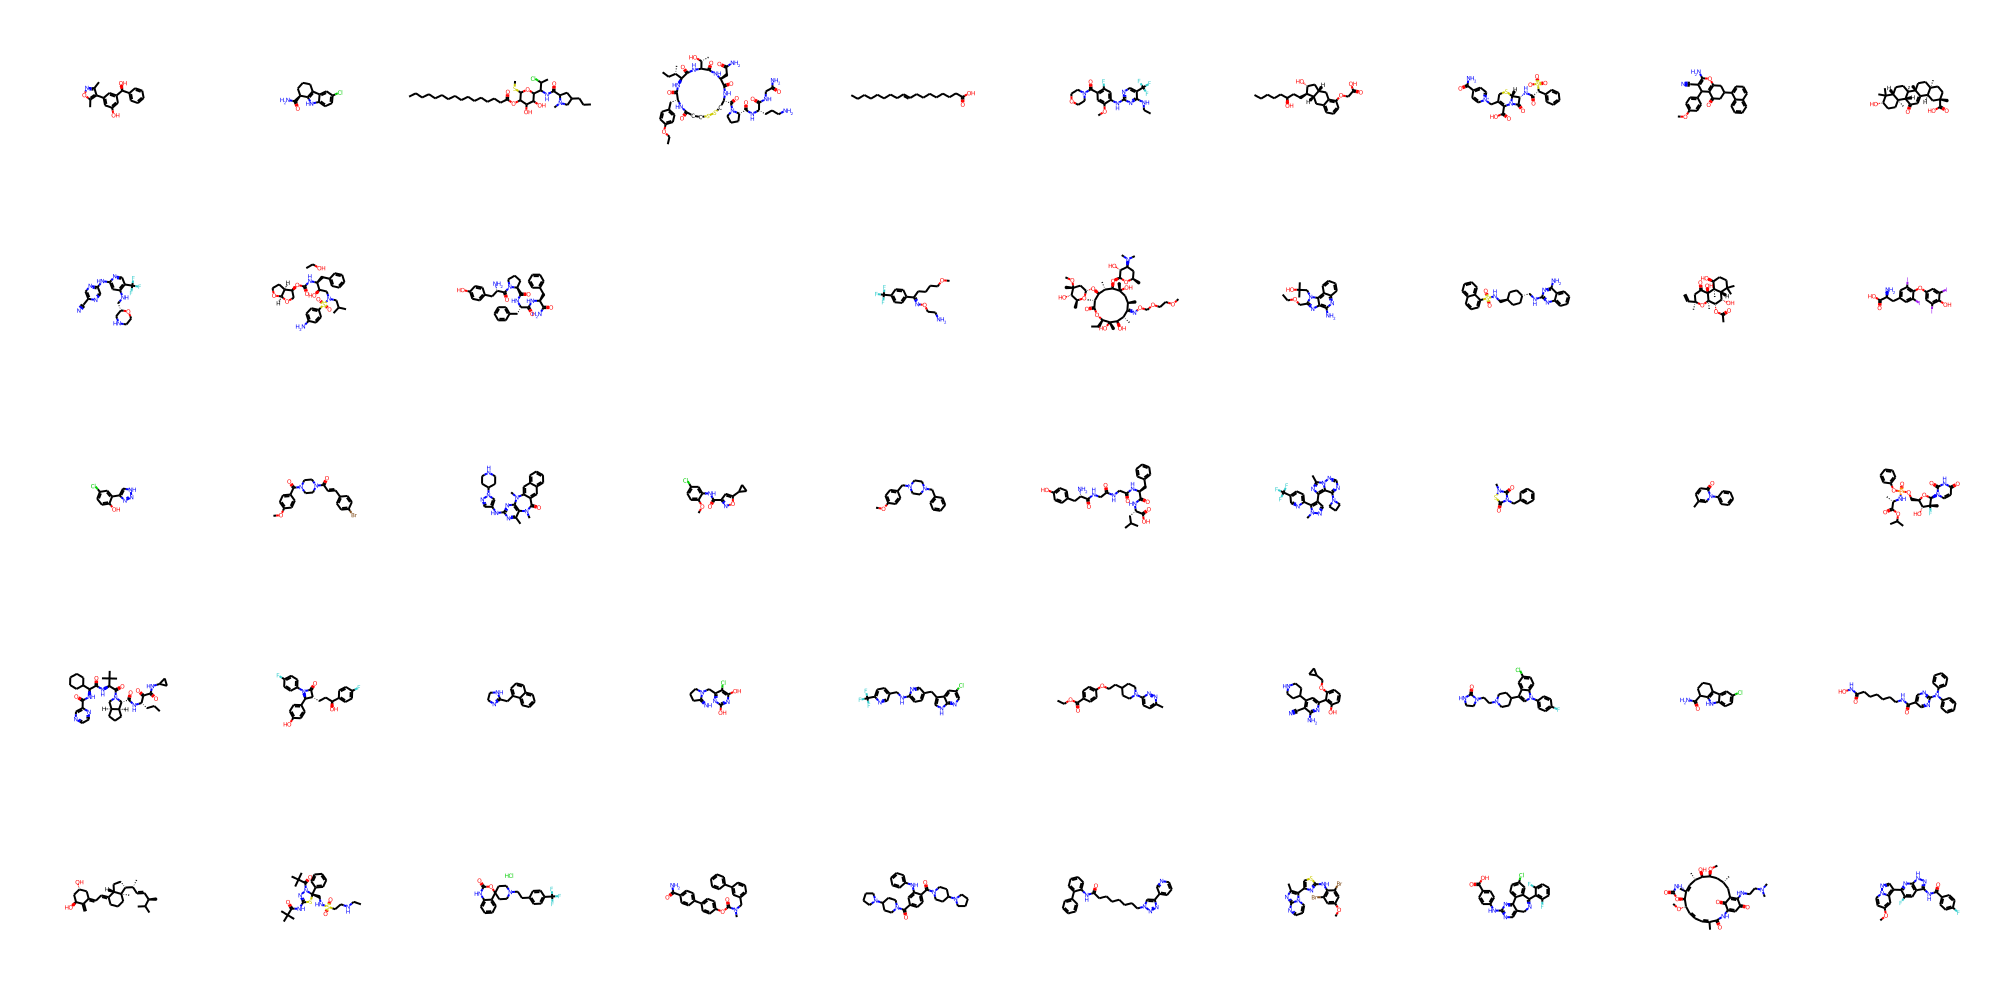

In [56]:
smiles_list = [

'Cc1noc(C)c1-c1cc(O)cc([C@@H](O)c2ccccc2)c1',
'NC(=O)[C@H]1CCCc2c1[nH]c1ccc(Cl)cc21',
'CCCCCCCCCCCCCCCC(=O)OC1C(SC)OC(C(NC(=O)C2CC(CCC)CN2C)C(C)Cl)C(O)C1O',
'CCOc1ccc(C[C@H]2NC(=O)CCSSC[C@@H](C(=O)N3CCC[C@H]3C(=O)N[C@@H](CCCN)C(=O)NCC(N)=O)NC(=O)[C@H](CC(N)=O)NC(=O)C([C@@H](C)O)NC(=O)[C@H]([C@@H](C)CC)NC2=O)cc1',
'CCCCCCCC/C=C/CCCCCCCC(=O)O',
'CCNc1nc(Nc2cc(F)c(C(=O)N3CCOCC3)cc2OC)ncc1C(F)(F)F',
'CCCCC[C@H](O)CC[C@@H]1[C@H]2Cc3cccc(OCC(=O)O)c3C[C@H]2C[C@H]1O',
'NC(=O)c1cc[n+](CC2=C(C(=O)O)N3C(=O)[C@@H](NC(=O)[C@@H](c4ccccc4)S(=O)(=O)[O-])[C@H]3SC2)cc1',
'COc1ccc(C2C(C#N)=C(N)OC3=C2C(=O)CC(c2cccc4ccccc24)C3)cc1',
'CC1(C)[C@@H](O)CC[C@@]2(C)[C@H]1CC[C@]1(C)[C@@H]2C(=O)C=C2[C@@H]3C[C@@](C)(C(=O)O)CC[C@]3(C)CC[C@]21C',
'N#Cc1cnc(Nc2cc(NC[C@H]3CNCCO3)c(C(F)(F)F)cn2)cn1',
'CC(C)CN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)O[C@H]1CO[C@H]2OCC[C@@H]12)S(=O)(=O)c1ccc(N)cc1.CCO',
'NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@@H]1CCCN1C(=O)[C@@H](N)Cc1ccc(O)cc1',
'No Data',
'COCCCC/C(=N\OCCN)c1ccc(C(F)(F)F)cc1',
'CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(OC)[C@@H](O)[C@H](C)O2)[C@H](C)[C@@H](O[C@@H]2O[C@H](C)C[C@H](N(C)C)[C@H]2O)[C@](C)(O)C[C@@H](C)/C(=N\OCOCCOC)[C@H](C)[C@@H](O)[C@]1(C)O',
'CCOCc1nc2c(N)nc3ccccc3c2n1CC(C)(C)O',
'Nc1nc(NC[C@H]2CC[C@H](CNS(=O)(=O)c3cccc4ccccc34)CC2)nc2ccccc12',
'C=C[C@@]1(C)CC(=O)[C@@]2(O)[C@](C)(O1)[C@@H](OC(C)=O)[C@@H](O)[C@H]1C(C)(C)CC[C@H](O)[C@@]12C',
'N[C@@H](Cc1cc(I)c(Oc2cc(I)c(O)c(I)c2)c(I)c1)C(=O)O',
'Oc1ccc(Cl)cc1-c1c[nH]nn1',
'COc1ccc(C(=O)N2CCN(C(=O)/C=C/c3ccc(Br)cc3)CC2)cc1',
'Cc1nc(Nc2cnn(C3CCNCC3)c2)nc2c1N(C)C(=O)c1cc3ccccc3cc1N2C',
'COc1ccc(Cl)cc1NC(=O)c1cc(C2CC2)on1',
'COc1ccc(CN2CCN(Cc3ccccc3)CC2)cc1',
'CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)CNC(=O)CNC(=O)[C@@H](N)Cc1ccc(O)cc1)C(=O)O',
'Cc1nc(-c2cnn(C)c2-c2ccc(C(F)(F)F)cn2)c2c(N3CCC3)ncnn12',
'Cn1sc(=O)n(Cc2ccccc2)c1=O',
'Cc1ccc(=O)n(-c2ccccc2)c1',
'CC(C)OC(=O)[C@H](C)NP(=O)(OC[C@H]1O[C@@H](n2ccc(=O)[nH]c2=O)[C@](C)(F)[C@@H]1O)Oc1ccccc1',
'CCC[C@H](NC(=O)[C@@H]1[C@H]2CCC[C@H]2CN1C(=O)[C@@H](NC(=O)[C@@H](NC(=O)c1cnccn1)C1CCCCC1)C(C)(C)C)C(=O)C(=O)NC1CC1',
'O=C1[C@H](CC[C@H](O)c2ccc(F)cc2)[C@@H](c2ccc(O)cc2)N1c1ccc(F)cc1',
'c1ccc2c(CC3=NCCN3)cccc2c1',
'N=C1CCCN1Cc1nc(O)nc(O)c1Cl',
'FC(F)(F)c1ccc(CNc2ccc(Cc3c[nH]c4ncc(Cl)cc34)cn2)cn1',
'CCOC(=O)c1ccc(OCCC2CCN(c3ccc(C)nn3)CC2)cc1',
'N#Cc1c(C2CCNCC2)cc(-c2c(O)cccc2OCC2CC2)nc1N',
'O=C1NCCN1CCN1CCC(c2cn(-c3ccc(F)cc3)c3ccc(Cl)cc23)CC1',
'NC(=O)C1CCCc2c1[nH]c1ccc(Cl)cc21',
'O=C(CCCCCCNC(=O)c1cnc(N(c2ccccc2)c2ccccc2)nc1)NO',
'C=C1/C(=C/C=C2\CCC[C@@]3(C)[C@H]2CC[C@@H]3[C@H](C)/C=C/[C@@H](C)C(C)C)C[C@@H](O)C[C@@H]1O',
'CCNCCS(=O)(=O)NC[C@@]1(c2ccccc2)SC(NC(=O)C(C)(C)C)=NN1C(=O)C(C)(C)C',
'Cl.O=C1Nc2ccccc2C2(CCN(CCc3ccc(C(F)(F)F)cc3)CC2)O1',
'CN(Cc1cccc(-c2ccccc2)c1)C(=O)Oc1ccc(-c2ccc(C(N)=O)cc2)cc1',
'O=C(c1ccc(C(=O)N2CCC(N3CCCC3)CC2)c(Nc2ccccc2)c1)N1CCC(N2CCCC2)CC1',
'O=C(CCCCCCCn1cc(-c2cccnc2)nn1)Nc1ccccc1-c1ccccc1',
'COc1cc(Br)c(Nc2nc(-c3c(C)nc4ncccn34)cs2)c(Br)c1',
'O=C(O)c1ccc(Nc2ncc3c(n2)-c2ccc(Cl)cc2C(c2c(F)cccc2F)=NC3)cc1',
'CO[C@H]1/C=C\C=C(/C)C(=O)NC2=CC(=O)C(NCCN(C)C)=C(C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C)/C=C(\C)[C@@H]1OC(N)=O)C2=O',
'COc1ccn2ncc(-c3nc4[nH]nc(NC(=O)c5ccc(F)cc5)c4cc3F)c2c1',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



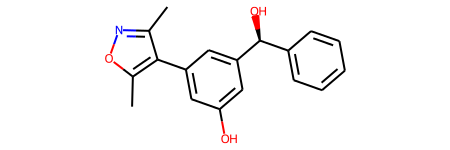

In [57]:
M1 = mol_list [0]
M1

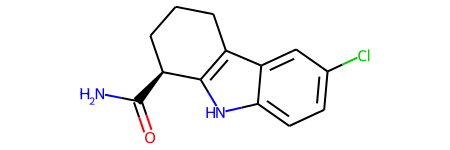

In [58]:
M2 = mol_list [1]
M2

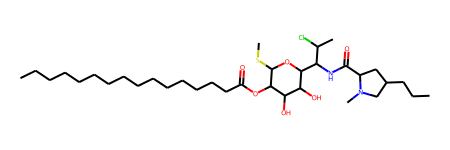

In [59]:
M3 = mol_list [2]
M3

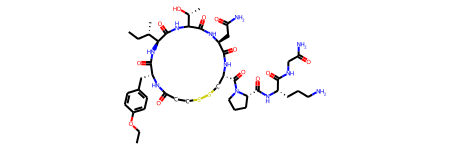

In [60]:
M4 = mol_list [3]
M4

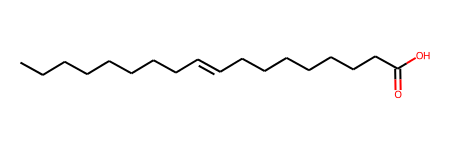

In [61]:
M5 = mol_list [4]
M5

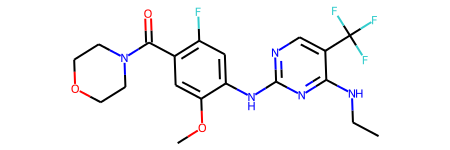

In [62]:
M6 = mol_list [5]
M6

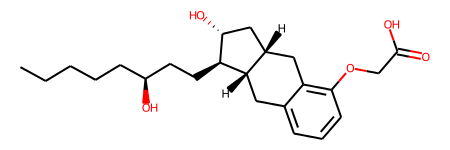

In [63]:
M7 = mol_list [6]
M7

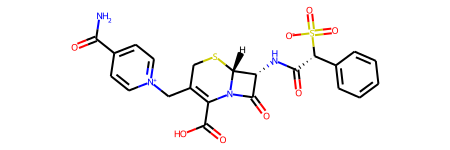

In [64]:
M8 = mol_list [7]
M8

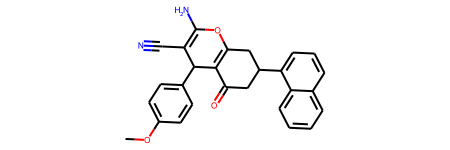

In [65]:
M9 = mol_list [8]
M9

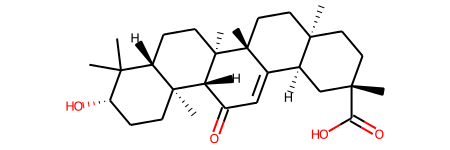

In [66]:
M10 = mol_list [9]
M10

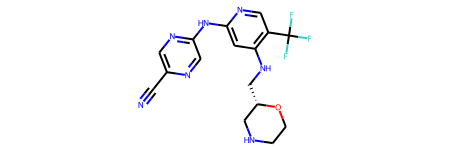

In [67]:
M11 = mol_list [10]
M11

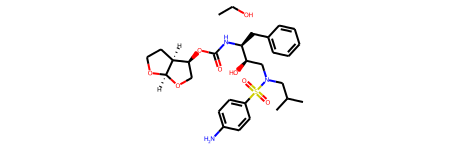

In [68]:
M12 = mol_list [11]
M12

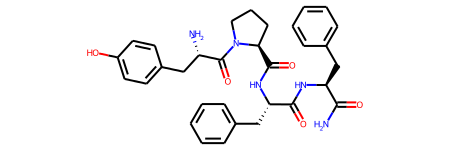

In [69]:
M13 = mol_list [12]
M13

In [70]:
M14 = mol_list [13]
M14

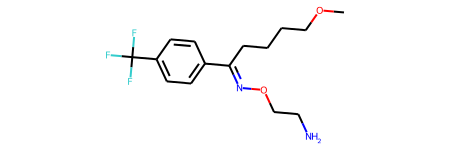

In [71]:
M15 = mol_list [14]
M15

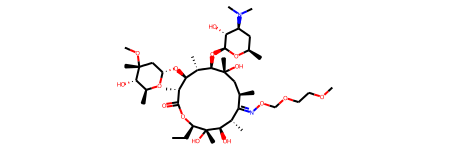

In [72]:
M16 = mol_list [15]
M16

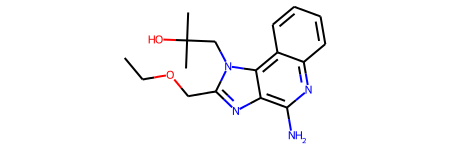

In [73]:
M17 = mol_list [16]
M17

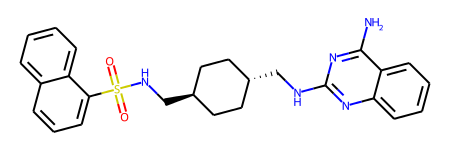

In [74]:
M18 = mol_list [17]
M18

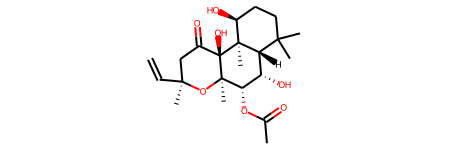

In [75]:
M19 = mol_list [18]
M19

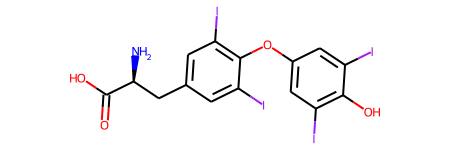

In [76]:
M20 = mol_list [19]
M20

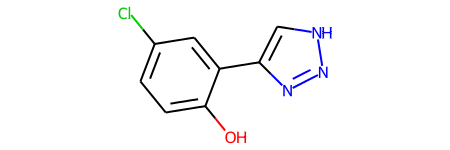

In [77]:
M21 = mol_list [20]
M21

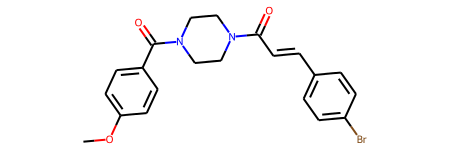

In [78]:
M22 = mol_list [21]
M22

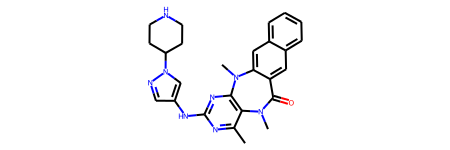

In [79]:
M23 = mol_list [22]
M23

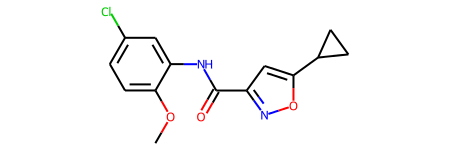

In [80]:
M24 = mol_list [23]
M24

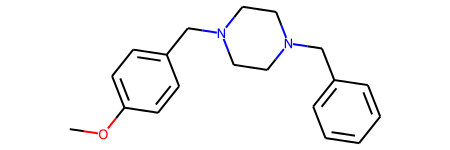

In [81]:
M25 = mol_list [24]
M25

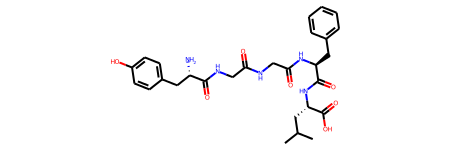

In [82]:
M26 = mol_list [25]
M26

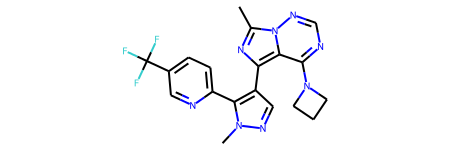

In [83]:
M27 = mol_list [26]
M27

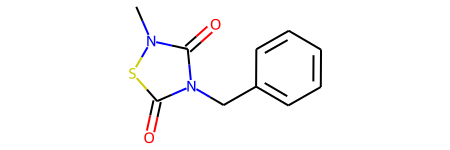

In [84]:
M28 = mol_list [27]
M28

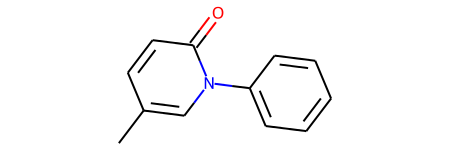

In [85]:
M29 = mol_list [28]
M29

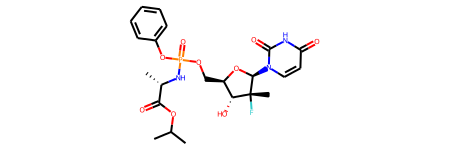

In [86]:
M30 = mol_list [29]
M30

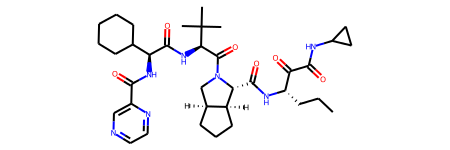

In [87]:
M31 = mol_list [30]
M31

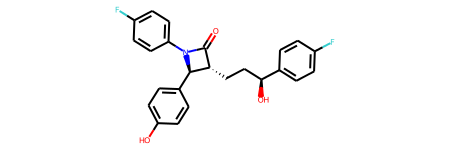

In [88]:
M32 = mol_list [31]
M32

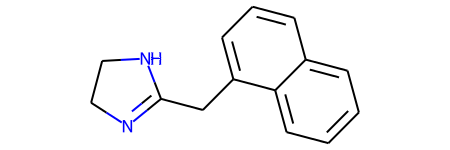

In [89]:
M33 = mol_list [32]
M33

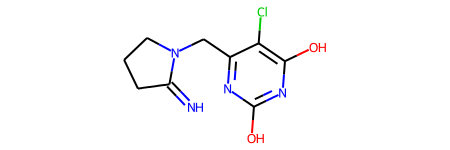

In [90]:
M34 = mol_list [33]
M34

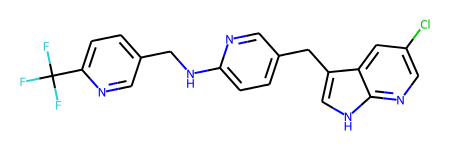

In [91]:
M35 = mol_list [34]
M35

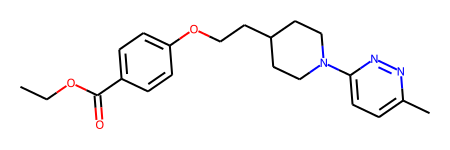

In [92]:
M36 = mol_list [35]
M36

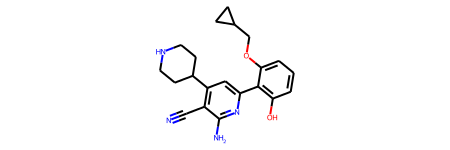

In [93]:
M37= mol_list [36]
M37

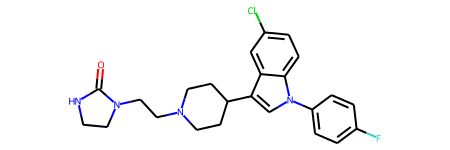

In [94]:
M38= mol_list [37]
M38

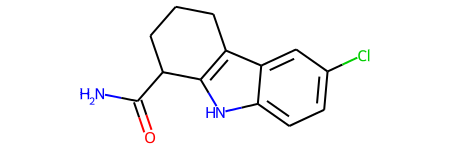

In [95]:
M39= mol_list [38]
M39

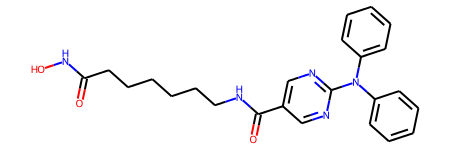

In [96]:
M40= mol_list [39]
M40

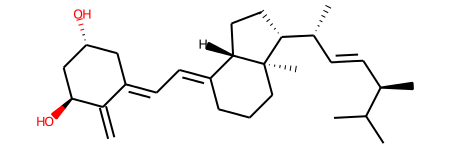

In [97]:
M41= mol_list [40]
M41

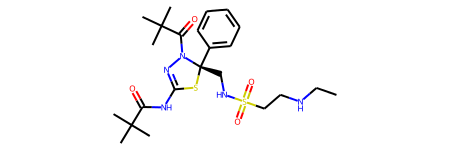

In [98]:
M42= mol_list [41]
M42

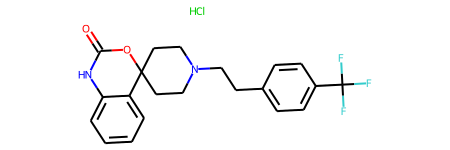

In [99]:
M43= mol_list [42]
M43

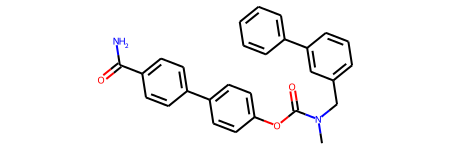

In [100]:
M44= mol_list [43]
M44

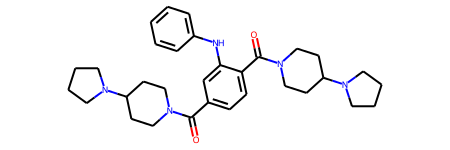

In [101]:
M45= mol_list [44]
M45

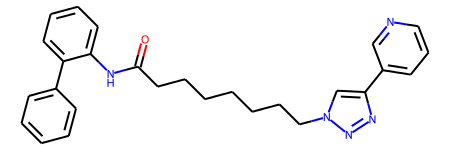

In [102]:
M46= mol_list [45]
M46

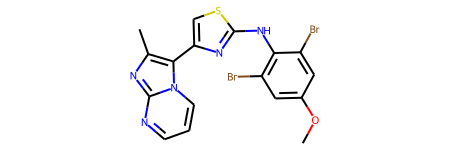

In [103]:
M47= mol_list [46]
M47

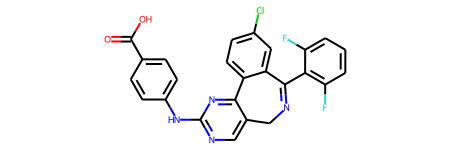

In [104]:
M48= mol_list [47]
M48

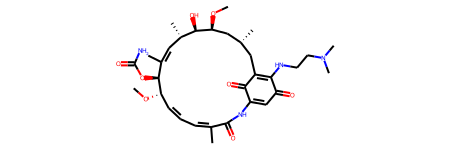

In [105]:
M49= mol_list [48]
M49

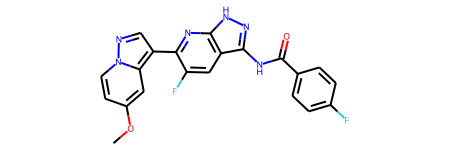

In [106]:
M50= mol_list [49]
M50